<a href="https://colab.research.google.com/github/rammeshulam/ml-exercise/blob/main/Classification_models_and_performance_metrics_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification models and performance metrics

This exercise explores decision trees and other classification algorithms. It starts with a warm-up exercise using dummy datasets to practice visualization, depth of decision trees, grid search cross validation and basic classification metrics.

The second qeustion focuses on a Telco Customer Churn dataset. In addition to the above, you will also perform exploratory data analysis (EDA) to identify patterns and relationships, and hyper-parameter tuning to align with business needs.

Interesting Links

* Classifiers:

 * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

 * [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

 * [XGBoost Classifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)

* Metrics:

 * [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

 * [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

 * [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

 * [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

 * [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)


# 0 Boilerplate

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
# cross_val_predict
from sklearn.preprocessing import StandardScaler,LabelEncoder
#OneHotEncoder,PowerTransformer

from sklearn.metrics import accuracy_score,classification_report, recall_score, roc_auc_score, precision_score, f1_score, roc_curve, auc
# ConfusionMatrixDisplay,RocCurveDisplay

from sklearn.datasets import make_blobs,make_moons,make_classification

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    """
    Visualizes the decision boundaries of a classifier.

    This function creates a scatter plot of the input data points and then
    overlays a color plot to represent the decision boundaries learned by
    the classifier.

    Parameters
    ----------
    model : object
        A trained scikit-learn classifier model.
    X : array-like, shape (n_samples, n_features)
        The input features of the data.
    y : array-like, shape (n_samples,)
        The target labels or classes corresponding to the data.
    ax : matplotlib.axes.Axes, optional
        The axes object to plot on. If None, the current axes will be used.
    cmap : str, optional
        The colormap to use for the visualization. Defaults to 'rainbow'.

    Returns
    -------
    None
    """
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

# 1 Warm up exercise
The exercise is based on three dummy data sets. The exercise aims to practice the basics of classification algorithms, different metrics and hyper-parameter tuning using grid-search cross-validation.

First, lets create a dataset with features (*X*) and classification of each row to 1 of 4 classes:

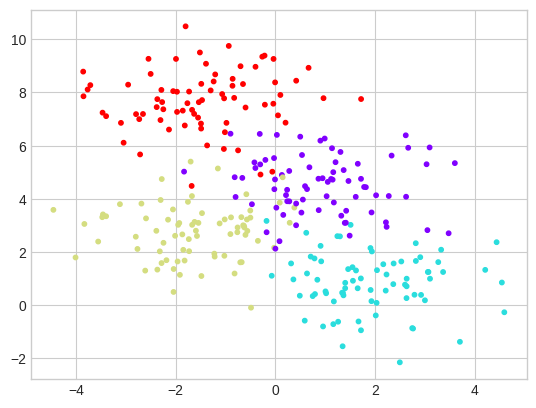

In [ ]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow');

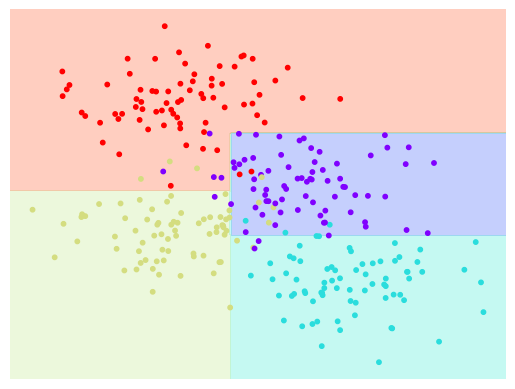

In [ ]:
  clf = DecisionTreeClassifier(max_depth=3)
  visualize_classifier(clf, X, y)

## 1.1 Visualization and depth of Decision Trees
1.1 Use *X* and *y* to train a DT. Use *max_depth=3*. Visualize the tree using

1.1.1 *export_text()*

1.1.2 *plot_tree()*

1.2 Use *visualize_classifier()* to experiment with different values of *max_depth*.

1.3 Use the DT function *get_depth()* to answer: what is the maximum depth of tree which the algorithm generates for *X* and *y*?


Let's create a different data-set, moons shaped:

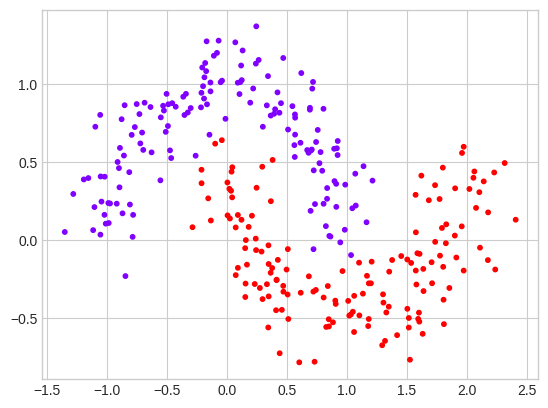

In [ ]:
X, y = make_moons(n_samples=300, noise=0.15, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow');

1.4 Repeat questions 1.2 and 1.3 on the moons dataset above.

In [ ]:
X, y = make_classification(n_samples=10000,
                          n_features=50,
                          n_informative=40,
                          n_redundant=10,
                          random_state=0)

## 1.2 Classification algorithms and measurements
The code above created a dummy dataset with 10,000 samples and 50 feaures.

1.2.1 split X and y to train (70%) and test (30%) datasets.

1.2.2 Use the training set to train a decision tree, k-nearest nighbor, and random forest classifiers (use default parameters).

1.2.3 Generate predictions for the test set (predict probabilities, not discrete classificaitons) and create a plot of ROC curves of all three classifiers

1.2.4 print ROC-AUC of each classifier

According to ROC-AUC metric, Which of the classifiers is the best for this dataset?

(Bonus: Can you avoid repeating code lines across classifiers?)

## 1.3 Grid-Search Cross-Validation
Using the same dataset from previous section:

1.3.1 Train a decision tree, use default parameters

1.3.2 Tune the hyper parameters of the model. Use Grid-Search Cross-Validation with the grid below (exectuion time might be long...). Your scoring metric (optimization goal) is ROC-AUC, so use ```scoring='roc_auc'```

Parameter grid:
```
{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}
```
1.3.3 Print the parameters and ROC-AUC of the best model


# 2 Telco Customer Churn

In this exercise you will build a model to predict customers who are about to churn from a telco company. At your disposal is a dataset of customers and their attribures. The target variable is 'churn'.

The exercise has three parts:

 (A) Exploratory Data Analysis (EDA), where you will gain understanding of the data, identify patterns, trends, and relationships, Uncover potential problems or anomalies, formulate hypotheses for further analysis and prepare data for modeling.

 (B) Build a classification model

 (C) Tune the model to align with business needs

## 2.1 Load data

### **Data Dictionary**

**CustomerID:** A unique ID that identifies each customer.

**Gender:** The customer’s gender: Male, Female

**Age:** The customer’s current age, in years, at the time the fiscal quarter ended.

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Married (Partner):** Indicates if the customer is married: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Number of Dependents:** Indicates the number of dependents that live with the customer.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Tenure:** Indicates the total amount of months that the customer has been with the company.

**Churn:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.



In [ ]:
df_raw = pd.read_csv('https://www.kaggle.com/api/v1/datasets/download/blastchar/telco-customer-churn', compression='zip')

## 2.2 Exploratory Data Analysis (EDA)

### 2.2.1 Initial steps
1. Take a look at a few lines
2. Remove duplicate rows if there are ones
3. Check for missing values and remove. In this exercise we'll remove rows with missing values.
4. Remove customerID column
5. What is the data type of each column?
6. Convert 'Total charges' and 'Tenure' to float
7. convert 'Churn' to numeric (0 and 1)
8. converge 'No internet service' to 'No' in all relevant columns

### 2.2.2 Identify patterns and relationships
1. what is the ratio between churn and no-churn in the dataset?
2. create two arrays, one array with categorical column names and one with numeric column names. Print both.
3. check correlation between each pair of numerical features (use heatmap to visualize). are there correlated features? are there features which corrolate with churn? What insights can you gain?
4. check relation between each of the categorical columns to churn - are there category values with a high/low rate of churn? What insights can you gain?


## 2.3 Build a classification model

1. Convert the categorical features using one hot encoding
2. Create a training-test sets with ratio of 80%-20%
3. Train and calculate performace of: XGBoost,RandomForest (use default settings)

Assume that business-wise, recall (i.e., identifying churn=1) is more important than precision.

4. Create 4 additional models, where weight of 'Churn=1' is 3 times and 5 times more high than 'Churn=0'. Hint: use 'class_weight' parameter for Random Forest and 'scale_pos_weight' for XGBoost.

5. summarize results in table. The table has 6 Rows (RF, XGBoost, RF_w3, XGBoost_w3 RF_w5, XGBoost_w5), and the following columns: Model, Accuracy, Recall, Precision, F1 Score, ROC AUC.

6. Bonus: use grid search with ```scoring='roc_auc'``` to tune the RF_w5. Focus on the following values:

```
{
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
```
replace the RF_w5 on the previous step with the tuned model.

7. Bonus^2: create a precision-recall chart to visualize the performance of 6 models.

Which classifier is the best for your purpose (assume the business require >80% recall)?
